# Práctica de Visualización de Datos    Curso 2020/21
Borja Arroyo Galende

# Información previa

La práctica se divide en tres partes fundamentales:
- Primer estudio de los datos. Comprender cómo se distribuyen y si existe algún tipo de patrón en una primera aproximación.
- Comprobar que el preprocesado y procesado están realizando una tarea adecuada en un enfoque iterativo.
- Estudiar los resultados obtenidos en el amplio campo conocido como analítica, ya sea una analítica exploratoria: tratar de utilizar la visualización para la toma de decisiones, como el aprendizaje automático y la consiguiente evaluación de modelos.

En cada uno de estos apartados aparecen gráficas junto con información textual. Además, para cada gráfica se justifica su elección y adecuación al objetivo concreto.

# Carga de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
df = pd.read_csv('datos/train.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         282451 non-null  int64  
 1   Dept          282451 non-null  int64  
 2   Date          282451 non-null  object 
 3   Weekly_Sales  282451 non-null  float64
 4   IsHoliday     282451 non-null  bool   
 5   Temperature   282451 non-null  float64
 6   Fuel_Price    282451 non-null  float64
 7   MarkDown1     100520 non-null  float64
 8   MarkDown2     74232 non-null   float64
 9   MarkDown3     91521 non-null   float64
 10  MarkDown4     90031 non-null   float64
 11  MarkDown5     101029 non-null  float64
 12  CPI           282451 non-null  float64
 13  Unemployment  282451 non-null  float64
 14  Type          282451 non-null  object 
 15  Size          282451 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 32.6+ MB


**En primer lugar, voy a convertir la columna "date" a fecha.**

In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         282451 non-null  int64         
 1   Dept          282451 non-null  int64         
 2   Date          282451 non-null  datetime64[ns]
 3   Weekly_Sales  282451 non-null  float64       
 4   IsHoliday     282451 non-null  bool          
 5   Temperature   282451 non-null  float64       
 6   Fuel_Price    282451 non-null  float64       
 7   MarkDown1     100520 non-null  float64       
 8   MarkDown2     74232 non-null   float64       
 9   MarkDown3     91521 non-null   float64       
 10  MarkDown4     90031 non-null   float64       
 11  MarkDown5     101029 non-null  float64       
 12  CPI           282451 non-null  float64       
 13  Unemployment  282451 non-null  float64       
 14  Type          282451 non-null  object        
 15  Size          282

# Primer estudio de datos

Como bien se menciona previamente, este apartado se centra en ayudar a comprender la "forma" de los datos al programador/científico de datos o quien quiera que realice el estudio.

Para ello son muy útiles los siguientes tipos de gráficos (relacionados con el tema 4):
- Para comprobar la distribución de una variable en su dominio, los histogramas son los más adecuados.
- Para estudiar las tendencias de un dato a lo largo de un intervalo de tiempo, se pueden utilizar líneas o barras.
- Para comprender la relación entre distintas variables, se pueden emplear los gráficos de dispersión. Si además se relacionan estas variables con el tiempo, un gráfico de líneas podría ser adecuado.

En cuanto a los detalles de la composición: canales de información, principios de la Gestalt, principios de composición, etc; se describen a su debido tiempo.

## Comprobación de las distribuciones de las variables

La librería pandas dispone de una función que es especialmente adecuada para tratar este tema.

Text(0.5, 0.98, 'Histograma de los atributos numéricos')

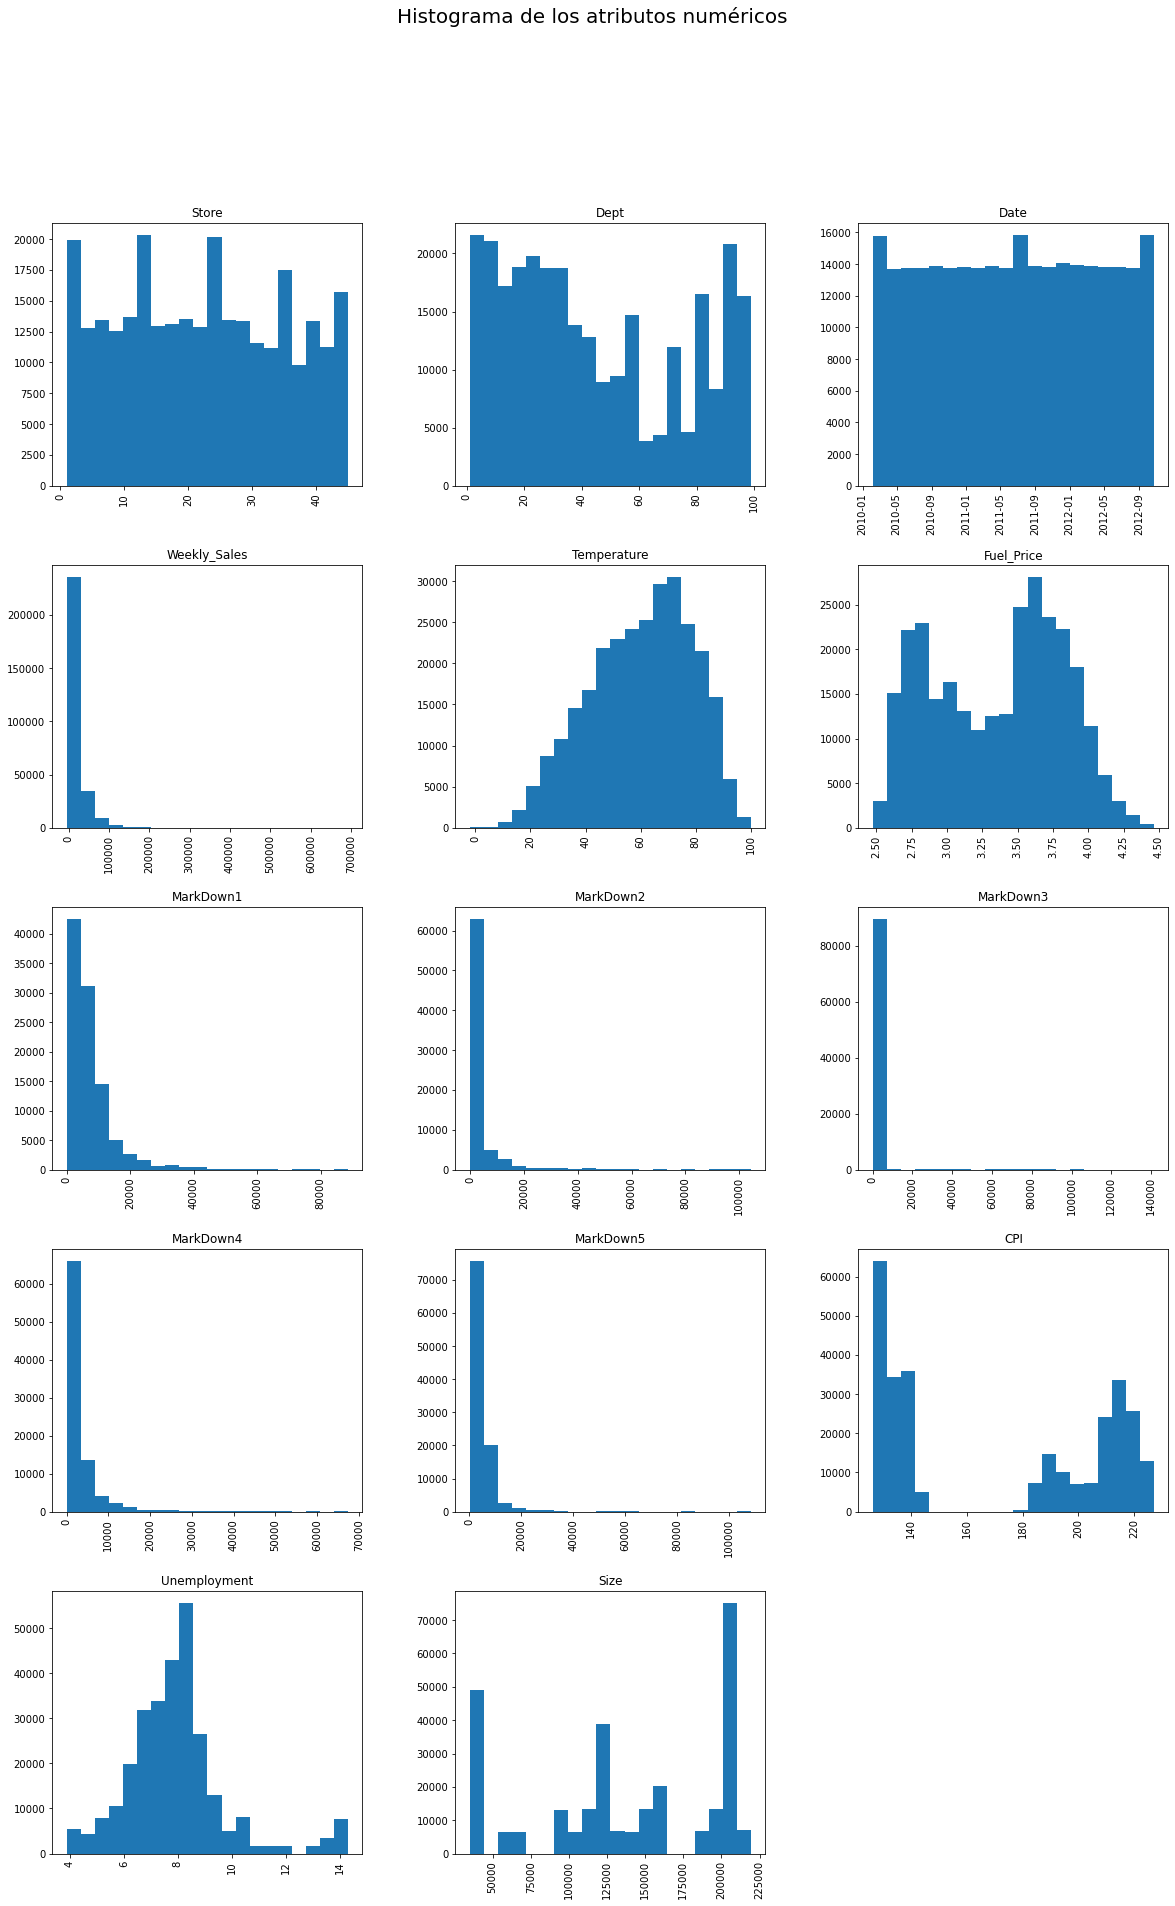

In [6]:
df.hist(figsize=(20, 30), grid=False, bins=20, layout=(-1, 3), xrot=90)
plt.suptitle('Histograma de los atributos numéricos', size=20)

Text(0.5, 0.98, 'Histograma en base logarítmica de los atributos numéricos')

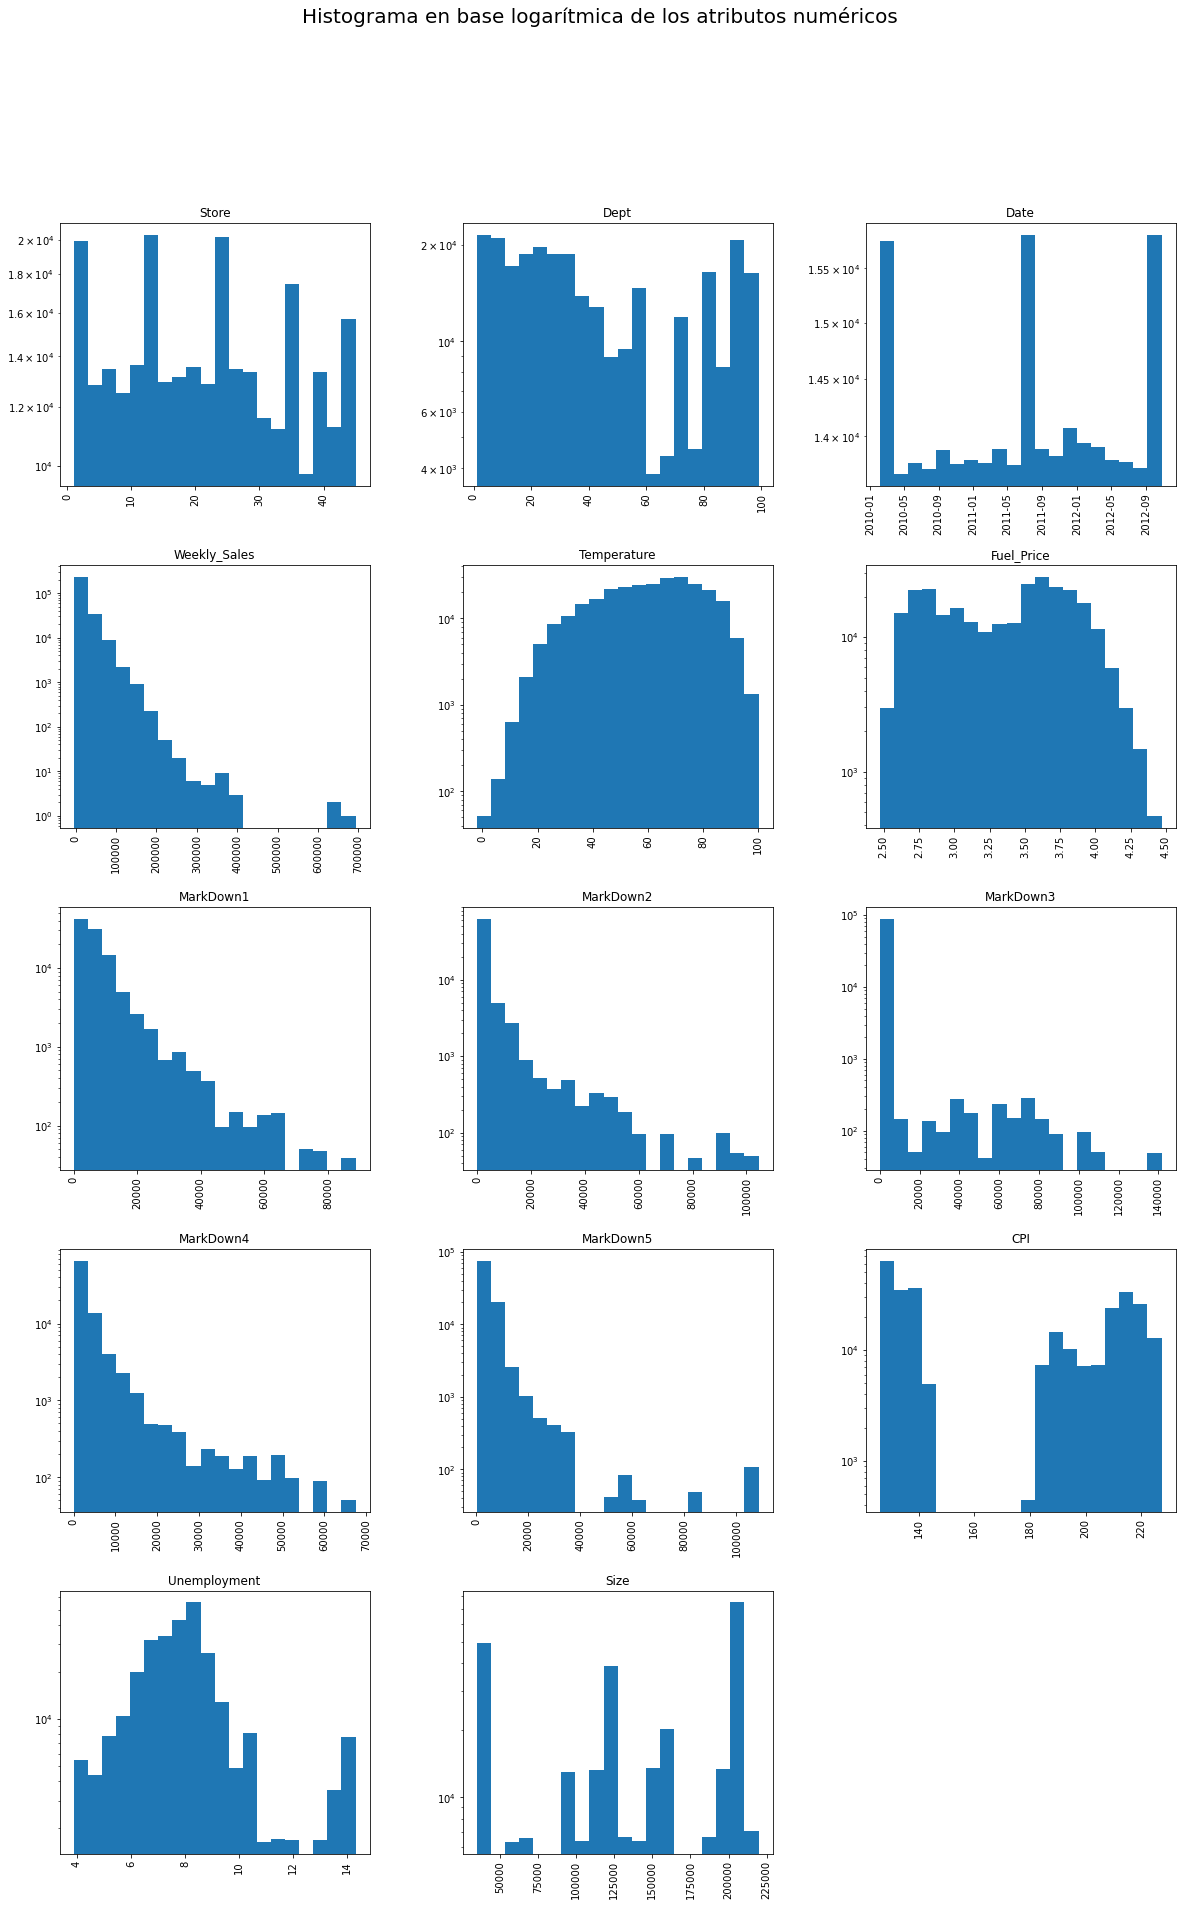

In [7]:
df.hist(figsize=(20, 30), grid=False, bins=20, layout=(-1, 3), xrot=90, log=True)
plt.suptitle('Histograma en base logarítmica de los atributos numéricos', size=20)

Los atributos cuyas distribuciones siguen algún tipo de patrón son los siguientes:
- Las fechas están bastante bien distribuidas de manera constante entre enero de 2010 y finales de 2012.
- Las ventas semanales parece que siguen una distribución exponencial.
- La temperatura es una función unimodal en torno a los 70 grados (imagino que en Farenheit).
- Los precios del combustible siguen una distribución bimodal. Buscando más información, he encontrado que el precio del combustible en EEUU varía mucho de un estado a otro. Siendo la costa oeste la que tiene los precios más caros, y el centro los más baratos. Además, en 2012 se produjo el récord histórico de precio de combustible, lo cual también explica el por qué del coste tan alto que refleja el gráfico.
- Los markdown siguen sendas exponenciales.
- El desempleo tiene una moda muy pronunciada.

Además, al haber utilizado dos gráficas: una primera en escala decimal y la otra en escala logarimica, puedo asegurarme de que los patrones que aparentemente aparecen en la primera figura son realmente así.

En cuanto a la composición, considero que los histogramas son bastante sencillos de interpretar y más cuando aparecen conjuntamente en distintas escalas. Por ello, no se emplean algunos canales que sí que podrían ser útiles en otro tipo de gráficas más sobrecargadas. Además, el girar las etiquetas del eje x permite que este eje no se sature, ya que en realidad no es que haya muchas etiquetas, sino que estas son extensas.

## Búsqueda de relaciones entre atributos

Utilizando la librería seaborn, es muy fácil descubrir qué pares de atributos están más relacionados. El siguiente gráfico se denomina mapa de calor o heatmap en inglés y presenta la información de una matriz de valores numéricos en escalas de colores. De esta manera, es muchísimo más sencillo encontrar los pares con mayor correlación que, en otro caso, habría que ir comprobando leyendo todos los números de uno a uno.

Text(0.5, 1.0, 'Mapa de calor de las correlaciones entre atributos')

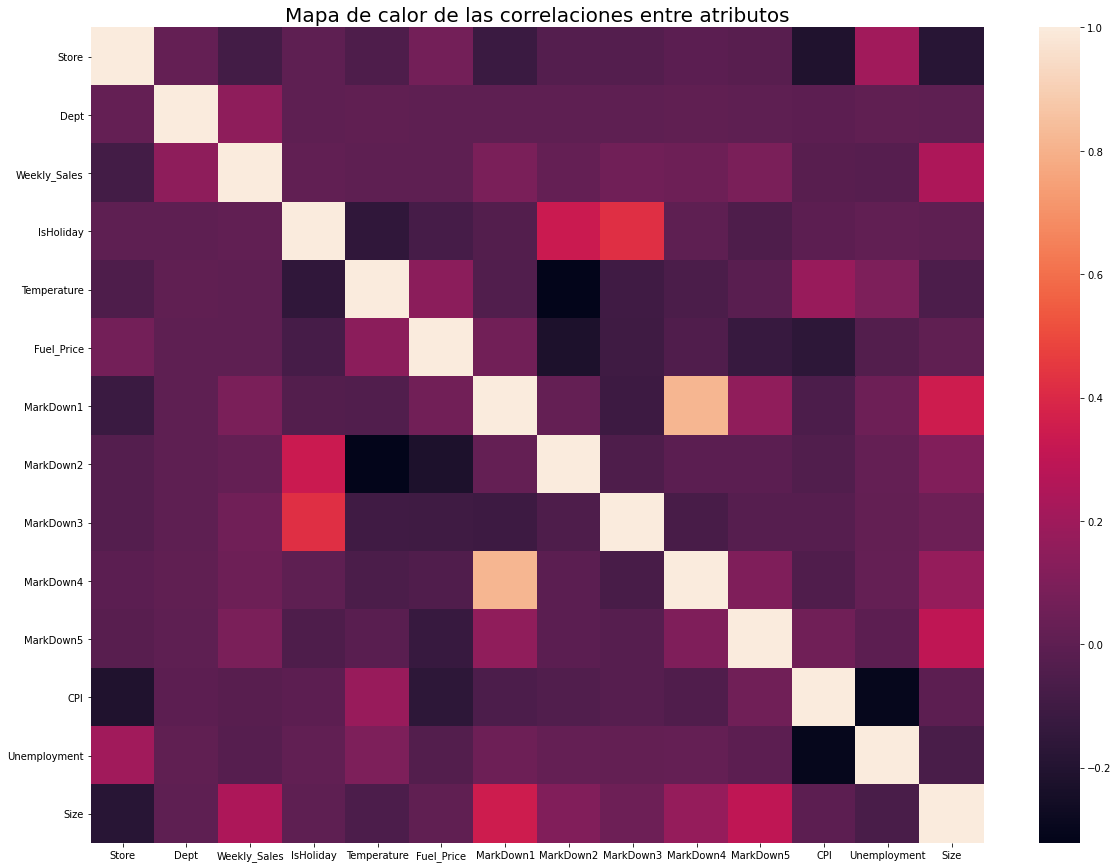

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax.set_title('Mapa de calor de las correlaciones entre atributos', fontdict={'fontsize': 20})

En cuanto a los principios de composición, en este gráfico sí que merece la pena destacar varios elementos:
- Los colores más llamativos reflejan correlaciones muy altas, mientras que los colores oscuros que pasan desapercibidos, correlaciones más bajas.
- Hay una leyenda. En las figuras con colores es necesario incorporarla.
- La leyenda se sitúa a la derecha y no en otro lugar. Es una buena práctica.
- Los elementos aparecen en el mismo orden en ambos ejes, de otra manera aunque tendría sentido el mapa de calor, este no representaría una matriz de correlación.

Siguiendo con el hilo del apartado, vemos como la relación de las ventas con el resto de atributos es bastante débil, si bien es cierto que tiene algún tipo de relación con todos los atributos. El atributo con el que más relación guarda es el tamaño. Veamos esta relación de forma más detallada.

Text(0.5, 1.0, 'Diagrama de dispersión entre las ventas y el tamaño de tienda')

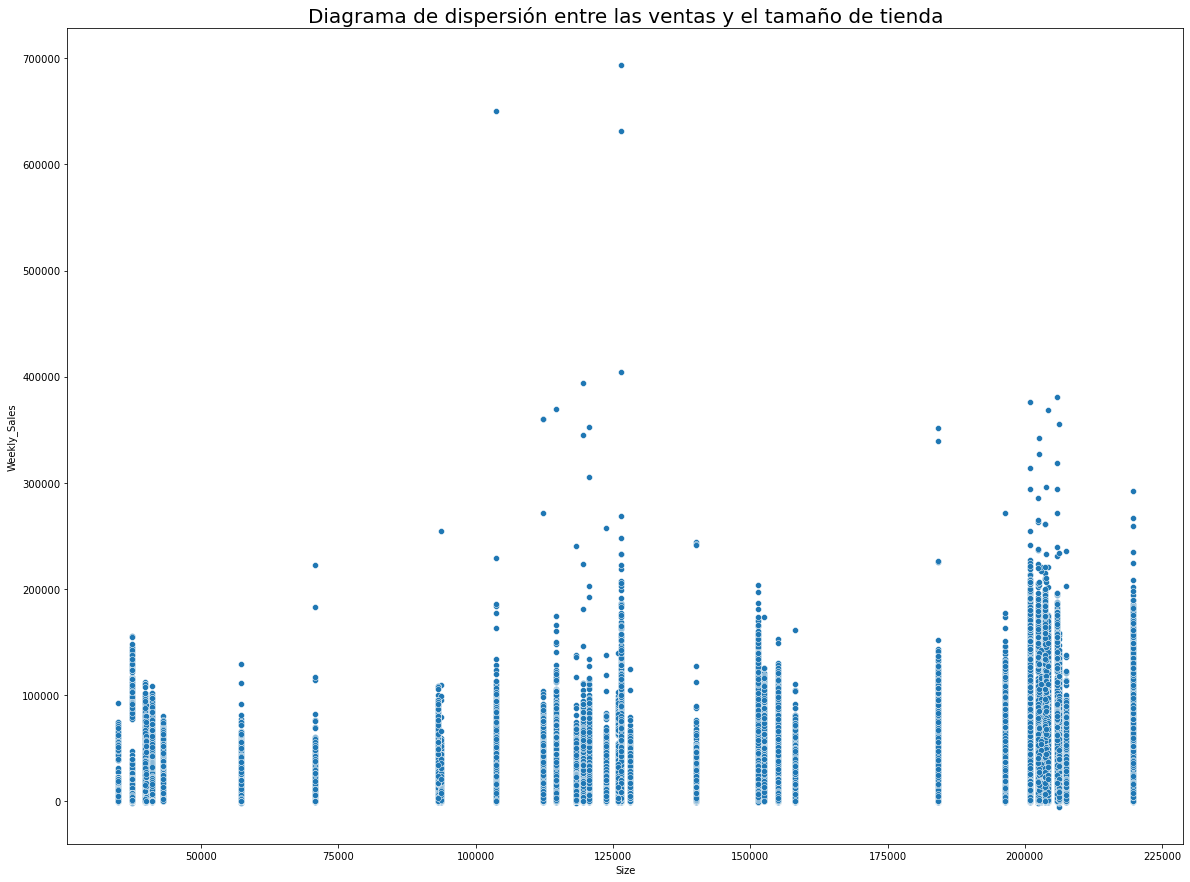

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.scatterplot(x=df['Size'], y=df['Weekly_Sales'])
ax.set_title('Diagrama de dispersión entre las ventas y el tamaño de tienda', fontdict={'fontsize': 20})

Lógicamente, el número de ventas es mayor a medida que la tienda es más grande. En caso contrario, no tendría sentido que los establecimientos fuesen grandes superficies.

Comprobemos ahora la relación entre distintas variables y las ventas.

### Temperatura

Text(0.5, 1.0, 'Diagrama de dispersión entre las ventas y la temperatura')

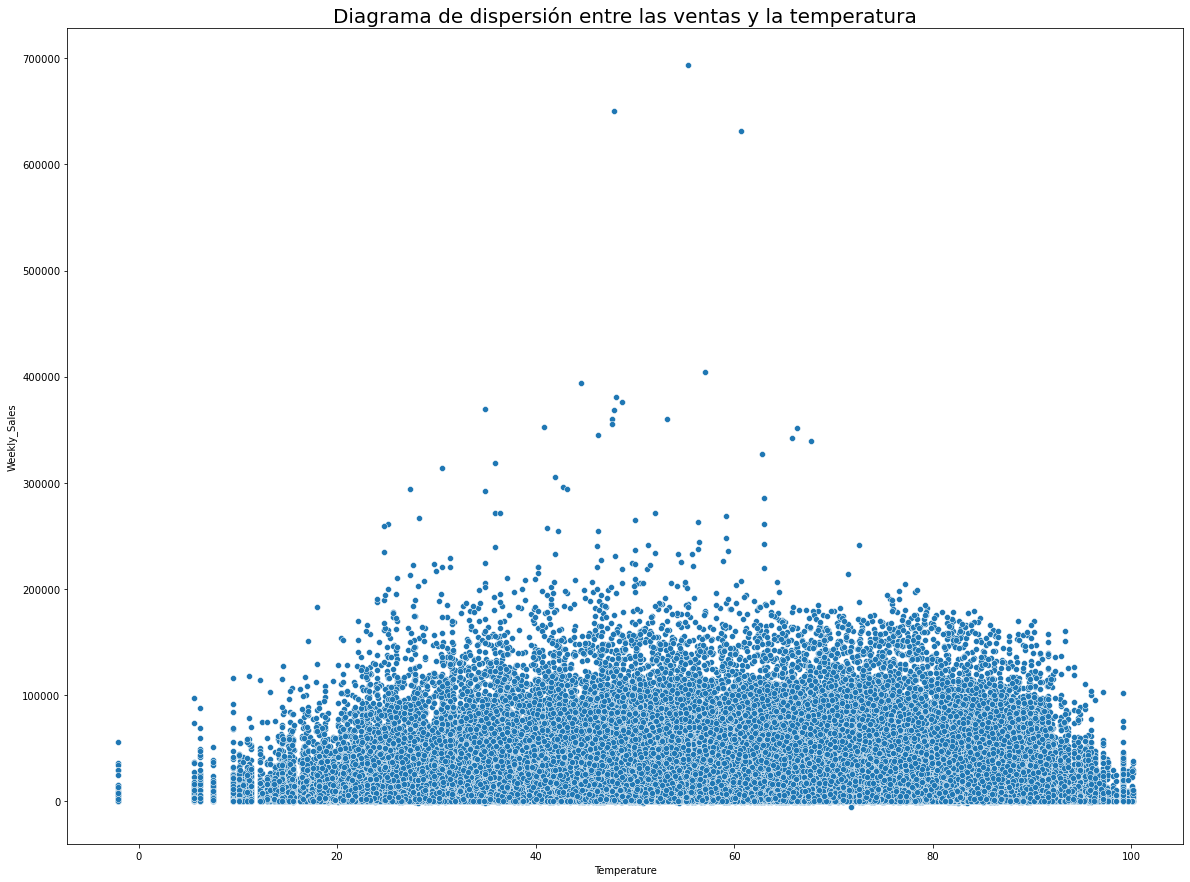

In [10]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.scatterplot(x=df['Temperature'], y=df['Weekly_Sales'])
ax.set_title('Diagrama de dispersión entre las ventas y la temperatura', fontdict={'fontsize': 20})

El gráfico muestra que hay una relación no lineal entre la temperatura y las ventas. Obviamente, cuando se realiza una matriz de correlación y se muestra ya sea numéricamente o gráficamente, estas correlaciones únicamente miden relaciones lineales. Por ejemplo, si un crecimiento en temperatura tuviese **siempre** acompañado un crecimiento en las ventas, entonces la correlación sería positiva. En este caso, existe una relación no lineal, pero es obvio que las ventas sí que se ven influenciadas por este factor.

También quisiera añadir que utilizar parámetros estadísticos de la muestra puede ser peligroso ya que habría que analizar independientemente cada uno de los días con sus respectivo nivel de ventas. Si por ejemplo se sumaran las ventas de todas las tiendas en un día y se promediase la temperatura, podría darse el caso de que la tienda más grande tuviese la temperatura más adecuada para vender mientras que las demás la peor temperatura, dando como resultado un dato alto cuando no debería ser así. Por ello, existen momentos en los que se puede utilizar algún tipo de resumen de los datos, pero en este caso es bastante difícil debido a las múltiples relaciones que a priori creo que podrían aparecer entre atributos.

### Precio de combustible

El precio de combustible sí que debería ser un atributo independiente de la tienda y del resto de atributos, o al menos esa es mi creencia. Como tal, sí que sería interesante tratar de resumir lo máximo posible para que el resultado sea conciso. Por ser más específico, en el ejemplo anterior se puede ver una tendencia pero no se puede extraer información precisa. En este caso, es mucho más probable que el resultado devuelva una mayor cantidad de información al receptor.

Para ello, primero hay que crear un dataframe con los valores de precio de combustible discretizados para luego agrupar las ventas utilizando algún parámetro de resumen como al media o la suma. En este caso, la suma no tiene sentido porque no todas las franjas de precios van a tener el mismo número de representantes, por lo que opto por la media.

In [11]:
# obtener máximo y mínimo
df['Fuel_Price'].describe()

count    282451.000000
mean          3.360300
std           0.458602
min           2.472000
25%           2.932000
50%           3.452000
75%           3.737000
max           4.468000
Name: Fuel_Price, dtype: float64

In [12]:
df['Disc_Fuel_Price'] = pd.cut(df['Fuel_Price'], np.linspace(2.5, 4.5, 100))
# comprobar que se satisface que no hay ejemplos sin cubrir por esos intervalos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Store            282451 non-null  int64         
 1   Dept             282451 non-null  int64         
 2   Date             282451 non-null  datetime64[ns]
 3   Weekly_Sales     282451 non-null  float64       
 4   IsHoliday        282451 non-null  bool          
 5   Temperature      282451 non-null  float64       
 6   Fuel_Price       282451 non-null  float64       
 7   MarkDown1        100520 non-null  float64       
 8   MarkDown2        74232 non-null   float64       
 9   MarkDown3        91521 non-null   float64       
 10  MarkDown4        90031 non-null   float64       
 11  MarkDown5        101029 non-null  float64       
 12  CPI              282451 non-null  float64       
 13  Unemployment     282451 non-null  float64       
 14  Type             282

In [13]:
# mostrar la nueva columna
df['Disc_Fuel_Price']

0         (3.793, 3.813]
1           (3.47, 3.49]
2         (2.702, 2.722]
3         (2.581, 2.601]
4         (4.015, 4.035]
               ...      
282446    (4.136, 4.157]
282447    (2.823, 2.843]
282448    (2.904, 2.924]
282449    (3.914, 3.934]
282450    (3.551, 3.571]
Name: Disc_Fuel_Price, Length: 282451, dtype: category
Categories (99, interval[float64]): [(2.5, 2.52] < (2.52, 2.54] < (2.54, 2.561] < (2.561, 2.581] ... (4.419, 4.439] < (4.439, 4.46] < (4.46, 4.48] < (4.48, 4.5]]

In [14]:
# agrupar por categoría y sacar la media de las ventas
aux1 = df.groupby('Disc_Fuel_Price').agg({'Weekly_Sales': 'mean'}).reset_index()
aux2 = df.groupby('Disc_Fuel_Price').agg({'Weekly_Sales': lambda x: x.quantile(.9)}).reset_index()
aux3 = df.groupby('Disc_Fuel_Price').agg({'Weekly_Sales': lambda x: x.quantile(.1)}).reset_index()

<AxesSubplot:title={'center':'Media y quantiles 10 y 90 para las ventas respecto al precio del combustible'}, xlabel='Disc_Fuel_Price'>

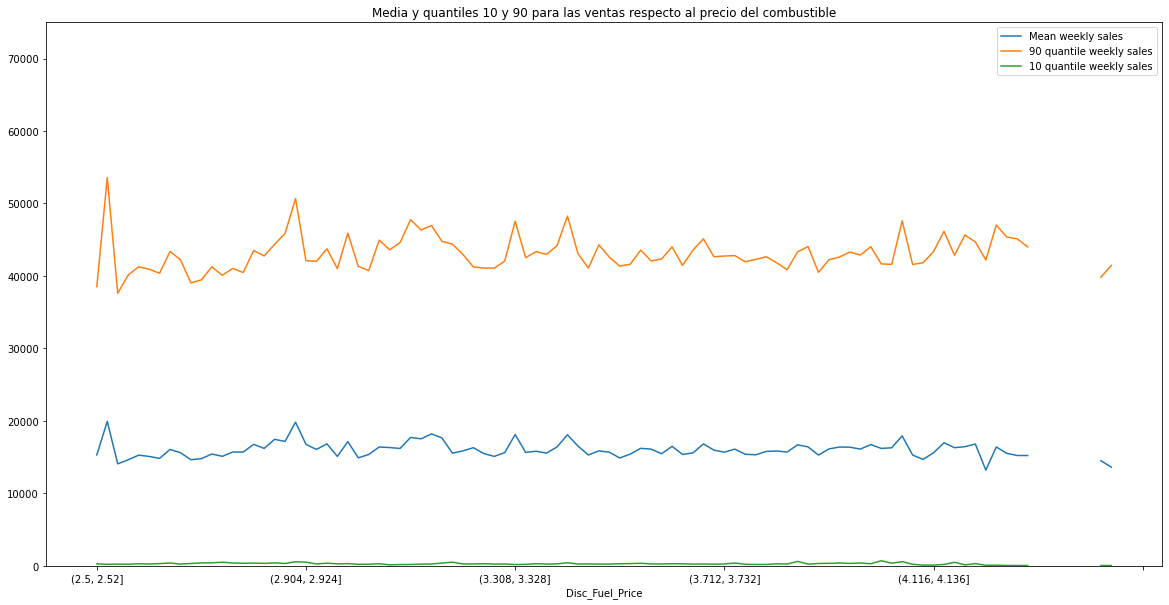

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Media y quantiles 10 y 90 para las ventas respecto al precio del combustible')
aux1.plot('Disc_Fuel_Price', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='Mean weekly sales')
aux2.plot('Disc_Fuel_Price', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='90 quantile weekly sales')
aux3.plot('Disc_Fuel_Price', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='10 quantile weekly sales')

Debido a que no hay valores nulos en ninguno de los dos campos, se pueden sacar conclusiones con una gran confianza acerca de esta gráfica. Lo primero que destaca es que parece que el precio del combustible no está muy relacionado con las ventas. Esto puede deberse a numerosos factores que obviamente no están descritos en esta gráfica. Por ejemplo, uno podría pensar que la gente no va normalmente en coche a comprar en esta cadena. No obstante, esta afirmación no tienen ningún soporte en la figura, sólamente se podría llegar a pensar que realmente no hay una relación.

### Tasa de paro

Si bien el precio de combustible no parece tener tanto efecto sobre las ventas, la tasa de paro sí que debería tenerlo. Nuevamente creo una variable discreta y realizo un resumen de los datos igual que en el caso anterior.

In [16]:
# obtener máximo y mínimo
df['Unemployment'].describe()

count    282451.000000
mean          7.968098
std           1.868070
min           3.879000
25%           6.891000
50%           7.866000
75%           8.572000
max          14.313000
Name: Unemployment, dtype: float64

In [17]:
df['Disc_Unemployment'] = pd.cut(df['Unemployment'], np.linspace(3.87, 14.4, 50))
# comprobar que se satisface que no hay ejemplos sin cubrir por esos intervalos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Store              282451 non-null  int64         
 1   Dept               282451 non-null  int64         
 2   Date               282451 non-null  datetime64[ns]
 3   Weekly_Sales       282451 non-null  float64       
 4   IsHoliday          282451 non-null  bool          
 5   Temperature        282451 non-null  float64       
 6   Fuel_Price         282451 non-null  float64       
 7   MarkDown1          100520 non-null  float64       
 8   MarkDown2          74232 non-null   float64       
 9   MarkDown3          91521 non-null   float64       
 10  MarkDown4          90031 non-null   float64       
 11  MarkDown5          101029 non-null  float64       
 12  CPI                282451 non-null  float64       
 13  Unemployment       282451 non-null  float64 

In [18]:
# mostrar la nueva columna
df['Disc_Unemployment']

0           (7.738, 7.953]
1         (10.317, 10.532]
2           (7.953, 8.168]
3           (6.234, 6.449]
4           (7.953, 8.168]
                ...       
282446      (7.953, 8.168]
282447      (8.383, 8.598]
282448      (8.813, 9.028]
282449      (7.738, 7.953]
282450      (6.234, 6.449]
Name: Disc_Unemployment, Length: 282451, dtype: category
Categories (49, interval[float64]): [(3.87, 4.085] < (4.085, 4.3] < (4.3, 4.515] < (4.515, 4.73] ... (13.54, 13.755] < (13.755, 13.97] < (13.97, 14.185] < (14.185, 14.4]]

In [19]:
# agrupar por categoría y sacar la media de las ventas
aux1 = df.groupby('Disc_Unemployment').agg({'Weekly_Sales': 'mean'}).reset_index()
aux2 = df.groupby('Disc_Unemployment').agg({'Weekly_Sales': lambda x: x.quantile(.9)}).reset_index()
aux3 = df.groupby('Disc_Unemployment').agg({'Weekly_Sales': lambda x: x.quantile(.1)}).reset_index()

<AxesSubplot:title={'center':'Media y quantiles 10 y 90 para las ventas respecto a la tasa de desempleo'}, xlabel='Disc_Unemployment'>

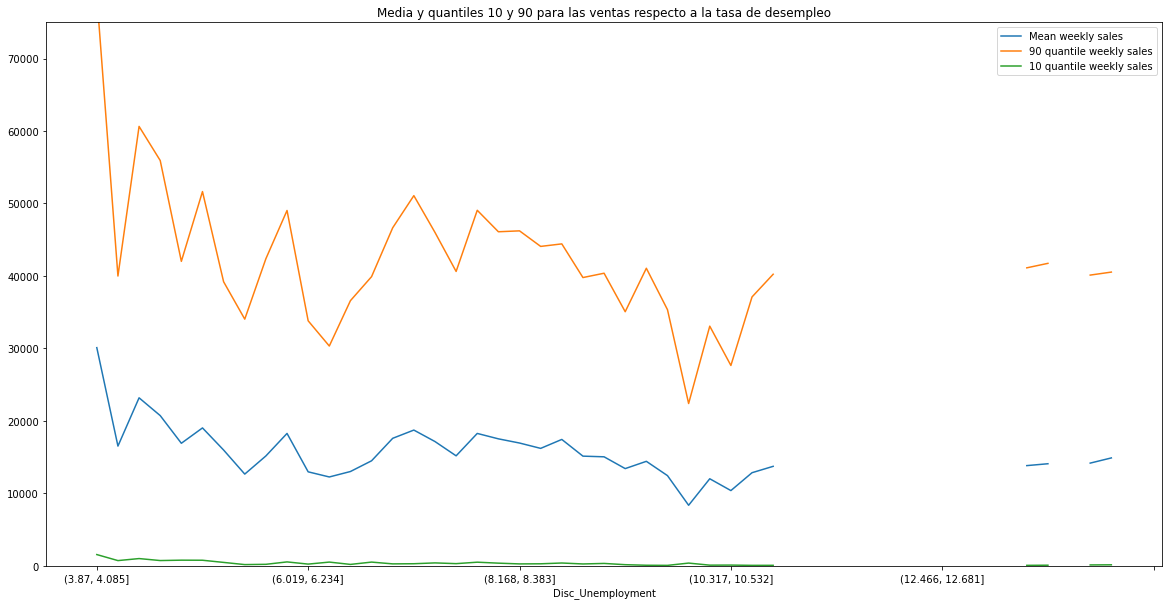

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Media y quantiles 10 y 90 para las ventas respecto a la tasa de desempleo')
aux1.plot('Disc_Unemployment', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='Mean weekly sales')
aux2.plot('Disc_Unemployment', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='90 quantile weekly sales')
aux3.plot('Disc_Unemployment', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='10 quantile weekly sales')

En este caso, sí que parece que existe una tendencia decreciente en cuanto a número de ventas. Obviamente, la tasa de desempleo suele marcar a las clases trabajadoras, habría que comprobar cuál es el objetivo de esta cadena para validar esta hipótesis. Por poner un ejemplo más conocido, en España no es lo mismo ir a comprar al Pull & Bear que ir a alguna tienda de lujo de la zona de Serrano de Madrid, los precios prohibitivos en el segundo caso hacen que su objetivo sea la gente más adinerada, gente a la que no suele afectar numerosos indicares como éste o el anterior.

Por otra parte, y como ya se deja entrever en el párrafo anterior, la ubicación de las tiendas responde también a la pregunta de averiguar el blanco de la cadena. El desempleo afecta desigualmente a lo largo de un territorio por lo que sería interesante tener unos valores sobre el desempleo más específicos.

### Índice de Precios al Consumidor

El IPC (CPI en inglés) es un indicador bastante importante sobre la situación económica de un estado. Suele variar en consecuencia de las oscilaciones producidas en la confianza de los consumidores. En cualquier caso, la tendencia siempre es creciente. Nuevamente, se puede utilizar un resumen de los datos para representar todo el conjunto.

In [21]:
# obtener máximo y mínimo
df['CPI'].describe()

count    282451.000000
mean        171.207802
std          39.160808
min         126.064000
25%         132.022667
50%         182.350989
75%         212.464799
max         227.232807
Name: CPI, dtype: float64

In [22]:
df['Disc_CPI'] = pd.cut(df['CPI'], np.linspace(126, 228, 50))
# comprobar que se satisface que no hay ejemplos sin cubrir por esos intervalos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282451 entries, 0 to 282450
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Store              282451 non-null  int64         
 1   Dept               282451 non-null  int64         
 2   Date               282451 non-null  datetime64[ns]
 3   Weekly_Sales       282451 non-null  float64       
 4   IsHoliday          282451 non-null  bool          
 5   Temperature        282451 non-null  float64       
 6   Fuel_Price         282451 non-null  float64       
 7   MarkDown1          100520 non-null  float64       
 8   MarkDown2          74232 non-null   float64       
 9   MarkDown3          91521 non-null   float64       
 10  MarkDown4          90031 non-null   float64       
 11  MarkDown5          101029 non-null  float64       
 12  CPI                282451 non-null  float64       
 13  Unemployment       282451 non-null  float64 

In [23]:
# mostrar la nueva columna
df['Disc_CPI']

0         (134.327, 136.408]
1         (128.082, 130.163]
2         (209.265, 211.347]
3          (213.429, 215.51]
4          (136.408, 138.49]
                 ...        
282446    (142.653, 144.735]
282447    (209.265, 211.347]
282448    (180.122, 182.204]
282449    (134.327, 136.408]
282450    (128.082, 130.163]
Name: Disc_CPI, Length: 282451, dtype: category
Categories (49, interval[float64]): [(126.0, 128.082] < (128.082, 130.163] < (130.163, 132.245] < (132.245, 134.327] ... (219.673, 221.755] < (221.755, 223.837] < (223.837, 225.918] < (225.918, 228.0]]

In [24]:
# agrupar por categoría y sacar la media de las ventas
aux1 = df.groupby('Disc_CPI').agg({'Weekly_Sales': 'mean'}).reset_index()
aux2 = df.groupby('Disc_CPI').agg({'Weekly_Sales': lambda x: x.quantile(.9)}).reset_index()
aux3 = df.groupby('Disc_CPI').agg({'Weekly_Sales': lambda x: x.quantile(.1)}).reset_index()

<AxesSubplot:title={'center':'Media y quantiles 10 y 90 para las ventas respecto a la tasa de desempleo'}, xlabel='Disc_CPI'>

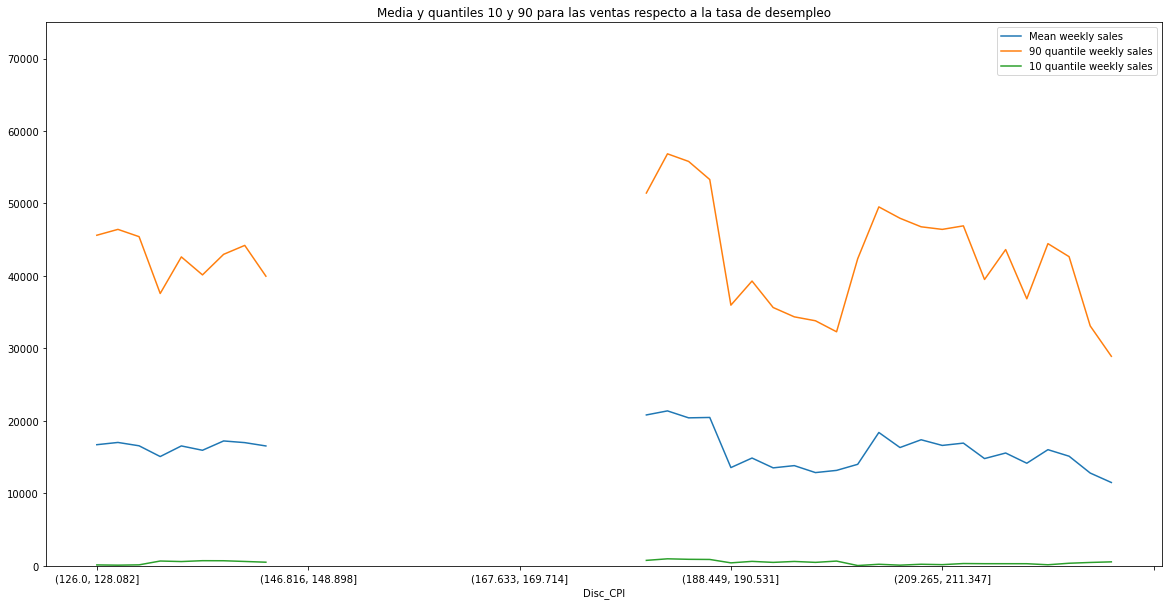

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Media y quantiles 10 y 90 para las ventas respecto a la tasa de desempleo')
aux1.plot('Disc_CPI', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='Mean weekly sales')
aux2.plot('Disc_CPI', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='90 quantile weekly sales')
aux3.plot('Disc_CPI', 'Weekly_Sales', figsize=(20, 10), ylim=(0, 75000), ax=ax, label='10 quantile weekly sales')

De este gráfico se pueden comentar dos cosas:
- No existen datos para una gran franja de tiempo. Según parece, esto no se debe a que haya valores nulos en la columna original, sino que simplemente hubo un salto en el IPC.
- El IPC nuevamente no afecta de la misma manera a toda la población ya que ocurre exactamente igual que en el apartado anterior. Sí que es verdad que para la franja de la que aparentemente se disponen de más datos (a partir de unos 170 puntos) parece que hay una tendencia decreciente. Sin embargo, si comparamos los valores más a la izquierda en el gráfico con los valores más a la derecha, podemos verque la tendencia no es tan clara y no es muy consistente en el dominio de valores.

### Relación entre las promociones y los festivos

A priori, uno puede pensar que los festivos deberían ser el momento ideal para establecer las promociones. Sería curioso de no ser así ya que la mayoría de personas libra los festivos y es cuando tienen tiempo de ir a hacer algún tipo de compra.

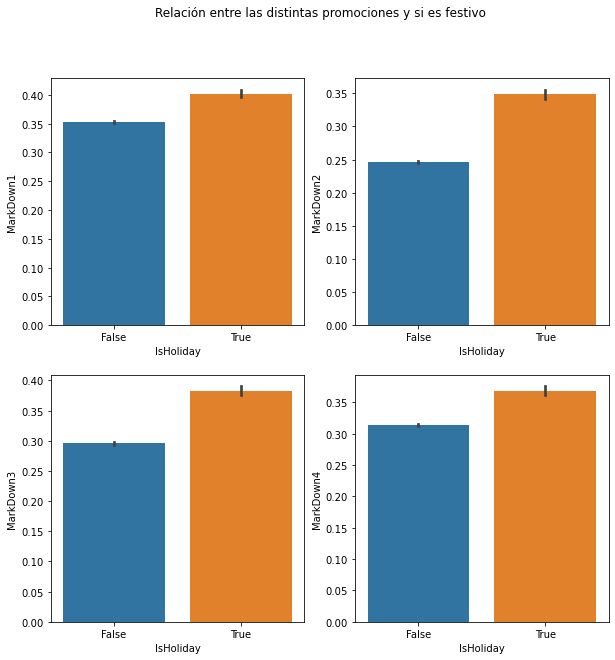

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
plt.suptitle('Relación entre las distintas promociones y si es festivo')
for ix, c in enumerate(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4']):
    # la siguiente sentencia es muy importante porque realmente buscamos la cuenta de las promociones
    # y no otro valor resultado de la suma
    aux = (df[c] > 1).astype('int')
    sns.barplot(x='IsHoliday', y=aux, data=df, ax=ax[ix // 2][ix % 2])

Principios de composición:
- Utilizar columnas de distintos colores para resaltar que se refieren a tres años diferentes.
- Presentar el eje y con un factor para que su interpretación sea más sencilla.
- Un único valor entero para cada columna en el eje x. No tiene sentido introducir valores intermedios (como hace pytplot, ver debajo).

Por otra parte, en cuanto al resultado del estudio de la relación, sí que parece que la mayoría de los descuentos ocurren en festivo, lo cual concuerda con la creencia a priori que he comentado antes.

## Estudio de las tendencias temporales

Los datos no sólo poseen un valor estático en un momento concreto, en este caso además se dispone de los momentos puntuales en los que se registraron todos los valores establecidos. De esta forma se puede obtener mucha información sobre la empresa, como la frecuencia con la que realizan algún tipo de campaña. Veamos esta información en un gráfico.

### Campañas promocionales

In [27]:
names = [f'MarkDown{i}' for i in range (1,6)]
colors = ['red', 'blue', 'orange', 'black', 'yellow']
names

['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

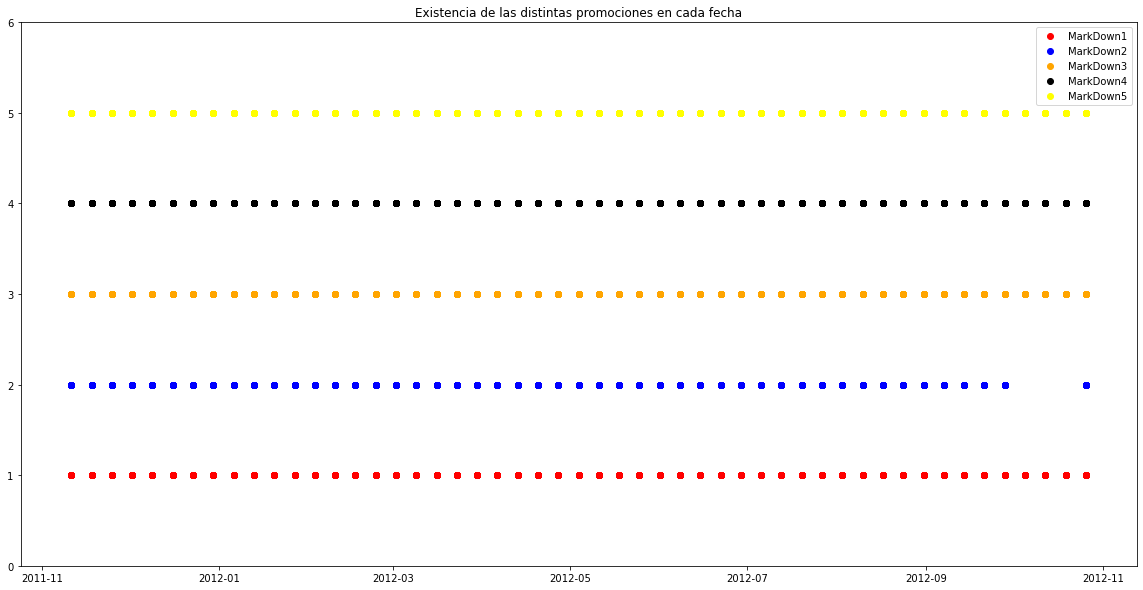

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_ylim(0, 6)
ax.set_title('Existencia de las distintas promociones en cada fecha')
for idx, (name, color) in enumerate(zip(names, colors)):
    aux_x = df[df[name] > 0]['Date']
    aux_y = df[df[name] > 0][name]
    values = (aux_y > 0) + idx
    ax.plot_date(x=aux_x, y=values, color=color, label=name)
ax.legend()
plt.show()

Como puede observarse, las promociones se distribuyen de una forma más o menos homogénea a lo largo del tiempo. Si la interpretación que tengo es correcta, las fechas que aparecen ahí son las únicas en las que hay alguna promoción activa. Para asegurarme, creo un gráfico de un único atributo con los días que hay y que no hay promociones.

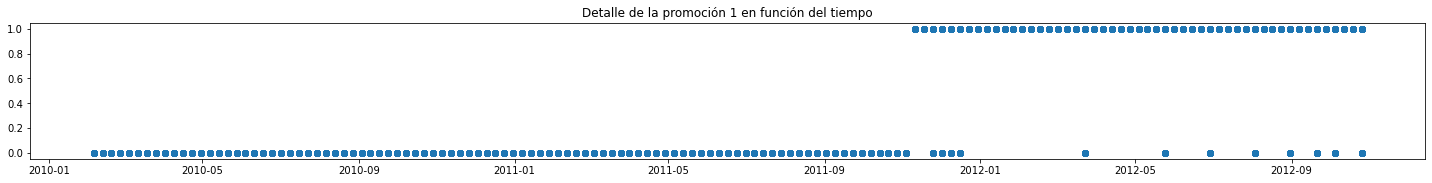

In [29]:
aux_x = df['Date']
aux_y = df['MarkDown1'] > 0
fig, ax = plt.subplots(figsize=(25, 2.5))
ax.set_title('Detalle de la promoción 1 en función del tiempo')
plt.plot_date(x=aux_x, y=aux_y)
plt.show()

Parece que la suposición realizada es la correcta, salvo días muy puntuales, existen numerosos días en los que al menos una tienda tenía alguna promoción activada. Este es un hecho importante ya que hay que considerar únicamente el caso de que la tienda en cuestión tenga alguna promoción activa, y no en que en el conjunto haya al menos una tienda con promoción, que es lo que realmente muestran las gráficas. Sería interesante realizar una visualización que contemple una agrupación por cada tienda, pero el número de tiendas es muy grande como para que esa visualización cumpla con su objetivo.

Principios de composición:
- Empezar el eje y en 0.
- Utilizar un color por cada grupo.
- Mostrar una leyenda en una zona que no afecte a la visualización.
- Mostrar el eje x considerándolo como una fecha.
- Utilizar un valor de y para cada tipo de promoción.

### Evolución del número de ventas por año

In [30]:
aux = df.groupby(df['Date'].dt.year).agg({'Weekly_Sales': 'sum'}).reset_index()
aux

,Date,Weekly_Sales
0,2010,1.534039e+09
1,2011,1.639797e+09
2,2012,1.340700e+09


<AxesSubplot:title={'center':'Ventas agrupadas por año'}, xlabel='Date', ylabel='Weekly_Sales'>

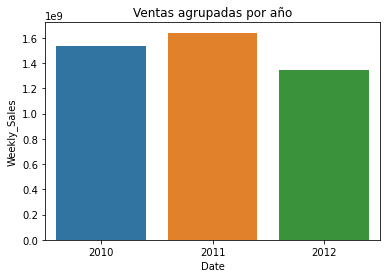

In [31]:
fig, ax = plt.subplots()
ax.set_title('Ventas agrupadas por año')
sns.barplot(x='Date', y='Weekly_Sales', data=aux)

Principios de composición:
- Gráfico de columnas para indicar valores acumulados en un cierto periodo y compararlos con sucesivos periodos.
- Utilizar columnas de distintos colores para resaltar que se refieren a tres años diferentes.
- Presentar el eje y con un factor para que su interpretación sea más sencilla.
- Un único valor entero para cada columna en el eje x. No tiene sentido introducir valores intermedios (como hace pytplot, ver debajo).

### Obtener un porcentaje de las ventas por tiendas para el último año

In [32]:
# Agrupar por tienda y ordenar
aux = df[df['Date'].dt.year == 2012][['Store', 'Weekly_Sales']].groupby('Store').agg({'Weekly_Sales': 'sum'}).reset_index()
aux.sort_values('Weekly_Sales', inplace=True, ascending=False)
aux.head()

,Store,Weekly_Sales
19,20,62073165.20
3,4,61573333.30
12,13,58858752.04
1,2,55499050.75
13,14,53222728.11


En la siguiente celda sustituyo el gráfico circular propuesto para corregir (ver más abajo) por este diagrama que resulta mucho más informativo.

<AxesSubplot:title={'center':'Porcentaje de ventas por tienda'}, xlabel='Store', ylabel='Weekly_Sales'>

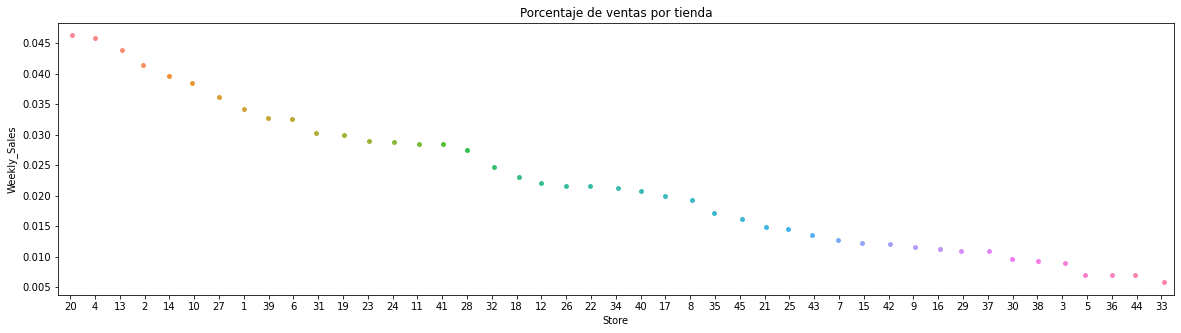

In [33]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Porcentaje de ventas por tienda')
sns.stripplot(x=aux['Store'], y=aux['Weekly_Sales']/aux['Weekly_Sales'].sum(), ax=ax, order=aux['Store'])

Principios de composición:
- Cambio de tono para denotar distintas tiendas.
- Utilizar una escala de un mismo color.
- Comenzar la gráfica en 0.
- Ordenar los valores según el eje y.

In [34]:
# calculate sales for the top 10 stores
first10 = aux[:5]['Weekly_Sales'].sum()
first10

291227029.40000004

In [35]:
# sales for the rest
other = aux[5:]['Weekly_Sales'].sum()
other

1049472558.4100001

In [36]:
aux1 = aux[:5]
aux1

,Store,Weekly_Sales
19,20,62073165.20
3,4,61573333.30
12,13,58858752.04
1,2,55499050.75
13,14,53222728.11


In [37]:
new_row = pd.DataFrame(data={'Store': ['other'], 'Weekly_Sales': [other]})
new_row

,Store,Weekly_Sales
0,other,1.049473e+09


In [38]:
aux = pd.concat([aux1, new_row]).reset_index(drop=True)
aux

,Store,Weekly_Sales
0,20,6.207317e+07
1,4,6.157333e+07
2,13,5.885875e+07
3,2,5.549905e+07
4,14,5.322273e+07
5,other,1.049473e+09


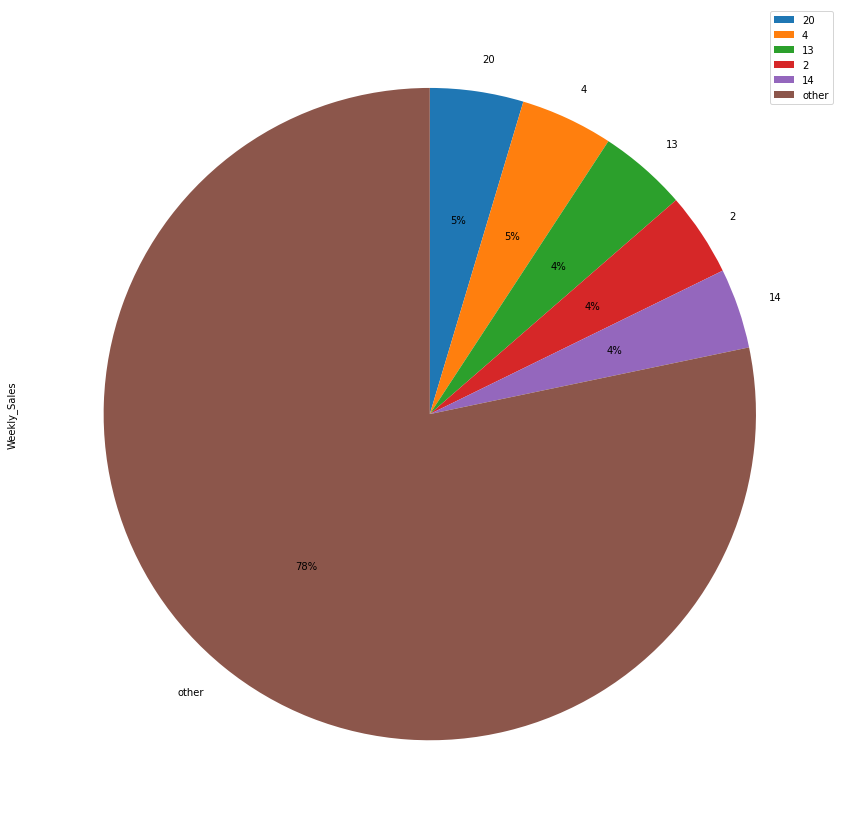

In [39]:
fig, ax = plt.subplots(figsize=(15, 15))
aux.plot(kind='pie', y='Weekly_Sales', labels=aux['Store'], ax=ax, normalize=True, startangle=90., counterclock=False, autopct='%1.0f%%');

En un principio pensaba que las ventas serían más desiguales, si bien es verdad que 5 tiendas representan en torno al 22 % de las ventas en el año de 2012. Esto determina que la distribución de tiendas debe haber sido muy cuidadosamente seleccionada por parte de la compañía.

Principios de composición:
- Gráfico tipo tarta/circular para mostrar las partes de un todo.
- Inicio de la secuencia en el eje vertical y en el sentido de las agujas del reloj.
- Mostrar los porcentajes así como una leyenda.
- Utilizar distintos colores para mejorar la respuesta del observador.

# Preprocesado de los datos

La limpieza de los datos es un proceso muy importante para utilizar técnicas de aprendizaje automático. Esta limpieza se efectúa en los siguientes términos:
- Para los tipos no numéricos, se debe comprobar que las categorías son las correctas. Es una tarea no visual por sus características.
- Para los tipos numéricos, se debe comprobar la coherencia de todos los ejemplos del conjunto de datos. Se puede hacer tanto matemática como visualmente.

Debido a las características de este trabajo, el preprocesado se centra en el segundo tipo de datos, es decir, atributos numéricos.

En primer lugar, se utiliza la librería seaborn para mostrar las relaciones pareadas entre atributos. Esto también se podría haber hecho en la etapa anterior, pero quería reservarlo para este momento.

In [40]:
df.dtypes

Store                         int64
Dept                          int64
Date                 datetime64[ns]
Weekly_Sales                float64
IsHoliday                      bool
Temperature                 float64
Fuel_Price                  float64
MarkDown1                   float64
MarkDown2                   float64
MarkDown3                   float64
MarkDown4                   float64
MarkDown5                   float64
CPI                         float64
Unemployment                float64
Type                         object
Size                          int64
Disc_Fuel_Price            category
Disc_Unemployment          category
Disc_CPI                   category
dtype: object

In [41]:
# crear un conjunto con todos los nombres de atributos numéricos
numeric = set()
for name, t in df.dtypes.iteritems():
    if 'int' in str(t):
        numeric.add(name)
    elif 'float' in str(t):
        numeric.add(name)
        
numeric

{'CPI',
 'Dept',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'Size',
 'Store',
 'Temperature',
 'Unemployment',
 'Weekly_Sales'}

In [42]:
# crear un conjunto con los numéricos que no deberían ser preprocesados
not_preprocessed = {'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Date', 'Store', 'Dept'}

In [43]:
numeric = numeric - not_preprocessed
numeric

{'CPI', 'Fuel_Price', 'Size', 'Temperature', 'Unemployment', 'Weekly_Sales'}

Text(0.5, 1.0, 'Diagramas de dispersión entre pares de atributos')

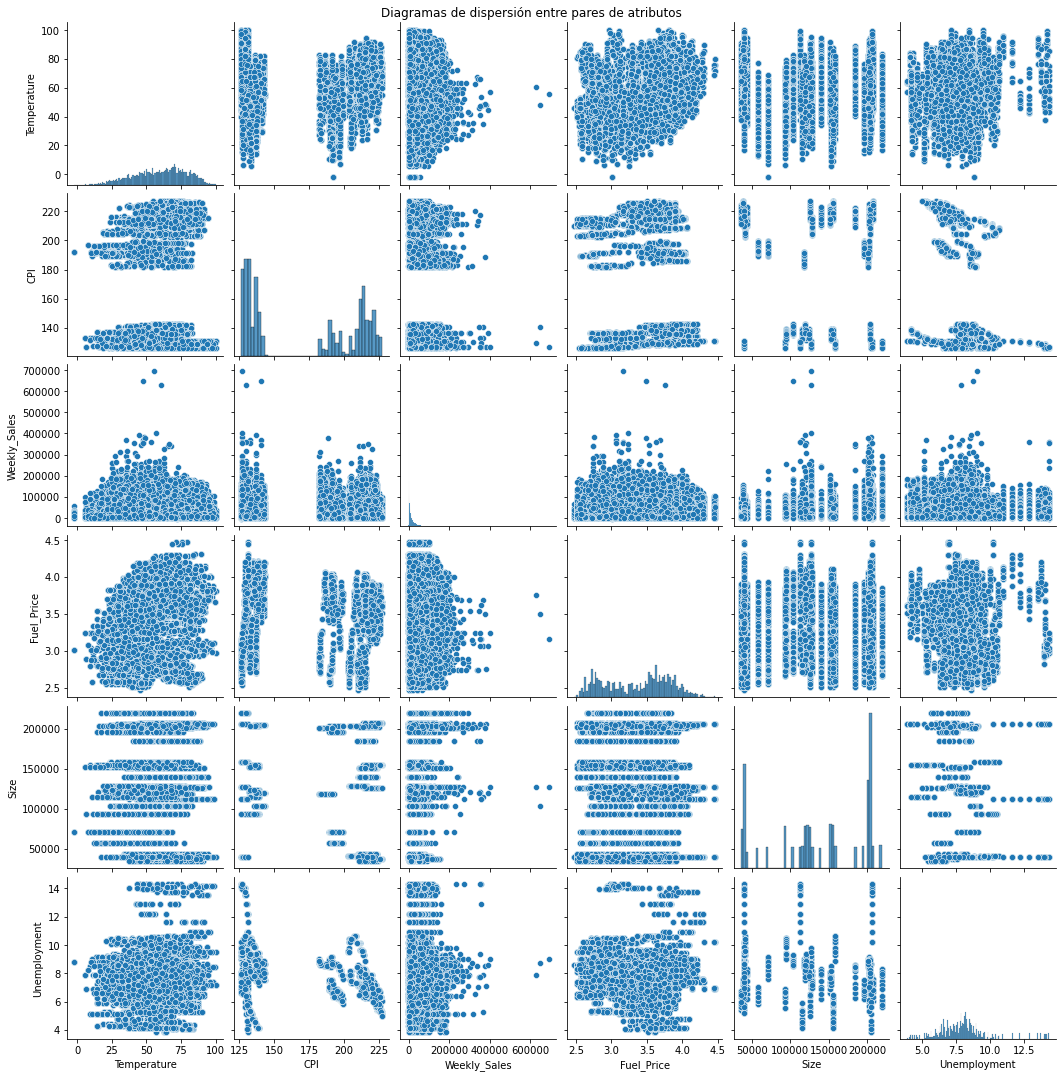

In [44]:
d = sns.pairplot(df, vars=numeric)
d.fig.suptitle('Diagramas de dispersión entre pares de atributos', y=1.0)

Principios de composición:
- Lo que en seaborn se denomina pairplot es una colección de gráficas que muestra los atributos de a dos para que visualmente se pueda extraer algún tipo de información. Cada uno de estos elementos se trata de un gráfico de dispersión de dos dimensiones.
- Es una forma muy rápida de obtener información acerca de valores atípicos y puntos de apalancamiento en cualquiera de los atributos.
- No pretende ser una figura que transmita una precisión alta, sino más bien una idea general.
- Habría sido interesante utilizar la opción KDE en la diagonal en lugar de un histograma, pero el tiempo de cómputo aumenta considerablemente.

En cuanto al contenido de la gráfica, de un vistazo se puede comprobar que existen tres puntos que son claros candidatos a ser considerados puntos atípicos. Estos puntos aparecen muy alejados de la población de datos.

In [45]:
df[df['Weekly_Sales'] > 600000]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Disc_Fuel_Price,Disc_Unemployment,Disc_CPI
83588,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,"(3.753, 3.773]","(7.738, 7.953]","(128.082, 130.163]"
193697,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,"(3.49, 3.51]","(8.598, 8.813]","(138.49, 140.571]"
258653,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,"(3.146, 3.167]","(8.813, 9.028]","(126.0, 128.082]"


Una vez vistos estos valores, considero que no son puntos atípicos por los siguientes motivos:
- En dos de ellos, existen varias promociones. En el tercero, es posible que no aparezca esta información por falta de datos no porque realmente no hubiese.
- La tasa de desempleo se sitúa en la franja más baja del dominio del atributo.
- Lo más importante, **estas compras coinciden en fecha** por lo que parece bastante claro que son valores bien recogidos.
- Por último, estoy seguro de que la recogida de datos es automática y no se hace de forma manual. Los sistemas automáticos presentan una menor incidencia de errores.

También aparece una hilera de puntos en las figuras que contienen el precio del combustible que es sospechosa.

In [46]:
df[df['Fuel_Price'] > 4.46]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Disc_Fuel_Price,Disc_Unemployment,Disc_CPI
1409,28,36,2012-10-12,721.85,False,71.74,4.468,1546.44,NaN,13.36,1057.73,6560.97,131.108333,10.199,A,206302,"(4.46, 4.48]","(10.102, 10.317]","(130.163, 132.245]"
1783,10,96,2012-10-12,14449.84,False,76.03,4.468,2674.51,NaN,10.32,1390.15,8116.13,131.108333,6.943,B,126512,"(4.46, 4.48]","(6.879, 7.093]","(130.163, 132.245]"
2004,33,67,2012-10-12,978.73,False,79.64,4.468,33.23,NaN,NaN,NaN,590.43,131.108333,6.895,A,39690,"(4.46, 4.48]","(6.879, 7.093]","(130.163, 132.245]"
2971,12,3,2012-10-12,11353.41,False,71.74,4.468,1986.92,NaN,16.75,910.50,4225.20,131.108333,10.199,B,112238,"(4.46, 4.48]","(10.102, 10.317]","(130.163, 132.245]"
4069,12,60,2012-10-12,324.00,False,71.74,4.468,1986.92,NaN,16.75,910.50,4225.20,131.108333,10.199,B,112238,"(4.46, 4.48]","(10.102, 10.317]","(130.163, 132.245]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272514,12,92,2012-10-12,25519.28,False,71.74,4.468,1986.92,NaN,16.75,910.50,4225.20,131.108333,10.199,B,112238,"(4.46, 4.48]","(10.102, 10.317]","(130.163, 132.245]"
272539,10,60,2012-10-12,522.00,False,76.03,4.468,2674.51,NaN,10.32,1390.15,8116.13,131.108333,6.943,B,126512,"(4.46, 4.48]","(6.879, 7.093]","(130.163, 132.245]"
275168,38,55,2012-10-12,9.96,False,71.74,4.468,202.43,NaN,8.66,0.22,700.92,131.108333,10.199,C,39690,"(4.46, 4.48]","(10.102, 10.317]","(130.163, 132.245]"
275998,38,92,2012-10-12,50316.92,False,71.74,4.468,202.43,NaN,8.66,0.22,700.92,131.108333,10.199,C,39690,"(4.46, 4.48]","(10.102, 10.317]","(130.163, 132.245]"


El precio de combustible marcó un pico ese día y todos los registros de datos se refieren a ese mismo días, hecho que demuestra que no son valores atípicos.

Comprobemos ahora los valores de cada columna numéricamente.

In [47]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000,100520.000000,74232.000000,91521.000000,90031.000000,101029.000000,282451.000000,282451.000000,282451.000000
mean,22.193166,44.286138,15983.429692,60.113640,3.360300,7246.077559,3318.408122,1417.397841,3379.591745,4639.476021,171.207802,7.968098,136730.073220
std,12.782138,30.503641,22661.092494,18.446485,0.458602,8254.606267,9485.575898,9547.858949,6269.428446,6060.459590,39.160808,1.868070,61002.319363
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.330000,46.780000,2.932000,2241.190000,40.960000,5.060000,508.100000,1877.810000,132.022667,6.891000,93638.000000
50%,22.000000,38.000000,7616.550000,62.150000,3.452000,5363.520000,191.820000,24.340000,1482.030000,3364.410000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20245.745000,74.290000,3.737000,9235.590000,1919.790000,103.130000,3607.570000,5563.800000,212.464799,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


Existen columnas con valores negativos. Habría que definir si este hecho es posible o no. A mi entender, los siguientes criterios son adecuados con este fin:
- La temperatura puede ser negativa pero con un matiz. Los grados están expresados en Fahrenheit, siendo 0 Celsius el equivalente a 32 Fahrenheit. En el caso de la temperatura más baja, que es de -2.06 °F, la equivalencia en celsius es de casi -19 °C.
- Las ventas semanales no tiene sentido que sean negativas, igual que las promociones. No sé exactamente qué representan pero no veo la lógica. Por ello, todos los valores negativos pasan a ser NA.

In [48]:
def convert_to_nan(data, columns):
    for col in columns:
        data.loc[data[col] < 0, (col)] = np.NAN

In [49]:
convert_to_nan(df, ['Weekly_Sales', 'MarkDown2', 'MarkDown3'])

In [50]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,282451.000000,282451.000000,281601.000000,282451.000000,282451.000000,100520.000000,73370.000000,91341.000000,90031.000000,101029.000000,282451.000000,282451.000000,282451.000000
mean,22.193166,44.286138,16031.882023,60.113640,3.360300,7246.077559,3357.734084,1420.207580,3379.591745,4639.476021,171.207802,7.968098,136730.073220
std,12.782138,30.503641,22678.070903,18.446485,0.458602,8254.606267,9534.150610,9557.052086,6269.428446,6060.459590,39.160808,1.868070,61002.319363
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.270000,0.000000,0.000000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2117.630000,46.780000,2.932000,2241.190000,43.420000,5.080000,508.100000,1877.810000,132.022667,6.891000,93638.000000
50%,22.000000,38.000000,7662.320000,62.150000,3.452000,5363.520000,199.800000,24.600000,1482.030000,3364.410000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20300.540000,74.290000,3.737000,9235.590000,1976.805000,103.340000,3607.570000,5563.800000,212.464799,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [51]:
# drop valores na en weekly_sales
df.dropna(axis=0, subset=['Weekly_Sales'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281601 entries, 0 to 282450
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Store              281601 non-null  int64         
 1   Dept               281601 non-null  int64         
 2   Date               281601 non-null  datetime64[ns]
 3   Weekly_Sales       281601 non-null  float64       
 4   IsHoliday          281601 non-null  bool          
 5   Temperature        281601 non-null  float64       
 6   Fuel_Price         281601 non-null  float64       
 7   MarkDown1          100189 non-null  float64       
 8   MarkDown2          73150 non-null   float64       
 9   MarkDown3          91051 non-null   float64       
 10  MarkDown4          89731 non-null   float64       
 11  MarkDown5          100696 non-null  float64       
 12  CPI                281601 non-null  float64       
 13  Unemployment       281601 non-null  float64 

## DBSCAN

Como parte del preprocesado, incluyo una técnica de detección de valores atípicos basada en el algoritmo DBSCAN. Además, genero una función que permite realizar visualizaciones de datos en base a PCA.

In [52]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [53]:
X = StandardScaler().fit_transform(df[numeric])
X[:3]

array([[ 0.05338934, -0.89377857,  3.13976505,  0.9503969 ,  0.2582675 ,
        -0.1075532 ],
       [-0.37979684, -1.08777109, -0.44474373,  0.26136894,  0.35006564,
         1.30032555],
       [-0.52509583,  1.02256502, -0.65314278, -1.42195255,  0.05592153,
         0.10435101]])

In [54]:
def reduce_and_plot(data, mask=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    X_new = PCA(n_components=2).fit_transform(data)
    assert X_new.shape[1] == 2
    ax.scatter(X_new[:, 0], X_new[:, 1], s=2, alpha=0.5, label='core')
    if mask is not None:
        ax.scatter(X_new[mask, 0], X_new[mask, 1], s=2, alpha=0.5, label='non-core')
        ax.legend(prop={'size': 20})

Text(0.5, 1.0, 'Datos reducidos a dos dimensiones mediante PCA')

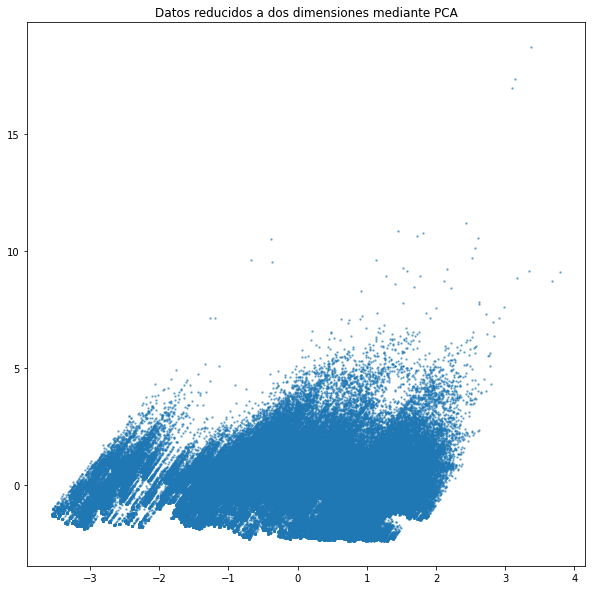

In [55]:
reduce_and_plot(X)
plt.title('Datos reducidos a dos dimensiones mediante PCA')

Como se puede apreciar, los datos se sitúan en un grupo bastante denso que se difumina a medida que la primera componente crece. DBSCAN es un algoritmo bastante bueno para estos casos en los que hay regiones muy densas y otras menos densas.

In [56]:
db = DBSCAN(eps=1, min_samples=10).fit(X)

In [57]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [58]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [59]:
n_clusters_, n_noise_

(2, 123)

Text(0.5, 1.0, 'Datos reducidos a 2D mediante PCA clasificados según si son instancias núcleo o no')

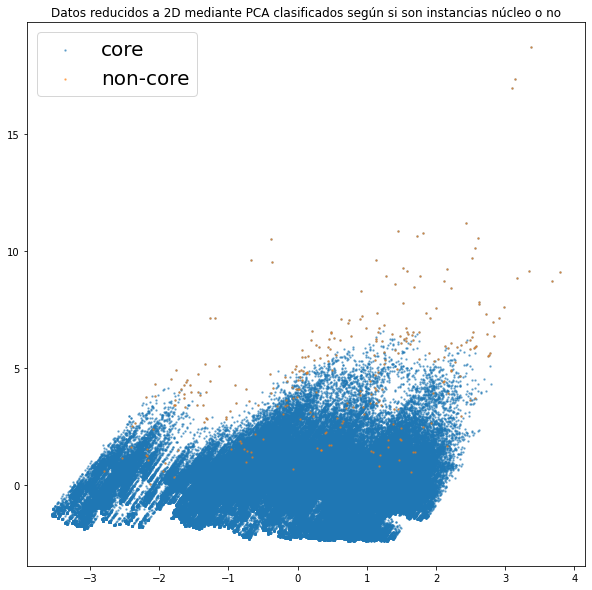

In [60]:
reduce_and_plot(X, ~core_samples_mask)
plt.title('Datos reducidos a 2D mediante PCA clasificados según si son instancias núcleo o no')

In [61]:
df[~core_samples_mask].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Disc_Fuel_Price,Disc_Unemployment,Disc_CPI
853,7,72,2010-12-17,76738.39,False,20.74,2.778,NaN,NaN,NaN,NaN,NaN,191.030338,9.137,B,70713,"(2.763, 2.783]","(9.028, 9.242]","(190.531, 192.612]"
1441,14,92,2011-09-09,214448.96,True,71.48,3.738,NaN,NaN,NaN,NaN,NaN,186.673738,8.625,A,200898,"(3.732, 3.753]","(8.598, 8.813]","(186.367, 188.449]"
2159,14,92,2011-08-05,197416.29,False,78.22,3.842,NaN,NaN,NaN,NaN,NaN,186.373404,8.625,A,200898,"(3.833, 3.854]","(8.598, 8.813]","(186.367, 188.449]"
4149,19,72,2011-11-25,296517.41,True,42.75,3.689,1328.35,1436.52,88805.58,23.79,1869.98,136.478800,7.866,A,203819,"(3.672, 3.692]","(7.738, 7.953]","(136.408, 138.49]"
4676,7,72,2011-12-23,113974.64,False,12.19,3.173,519.82,0.15,483.10,41.51,1313.38,196.171389,8.513,B,70713,"(3.167, 3.187]","(8.383, 8.598]","(194.694, 196.776]"


In [62]:
df[core_samples_mask].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Disc_Fuel_Price,Disc_Unemployment,Disc_CPI
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513,"(3.793, 3.813]","(7.738, 7.953]","(134.327, 136.408]"
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114,"(3.47, 3.49]","(10.317, 10.532]","(128.082, 130.163]"
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167,"(2.702, 2.722]","(7.953, 8.168]","(209.265, 211.347]"
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078,"(2.581, 2.601]","(6.234, 6.449]","(213.429, 215.51]"
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819,"(4.015, 4.035]","(7.953, 8.168]","(136.408, 138.49]"


Según parece, la columna de ventas semanales es bastante distinta en ambos casos, es posible que los valores más altos sean instancias poco frecuentes y por eso DBSCAN las agrupe. Veamos si es así.

In [63]:
df[~core_samples_mask]['Weekly_Sales'].describe()

count       275.000000
mean     181887.182436
std       87508.809595
min       50316.920000
25%      120609.820000
50%      170825.810000
75%      220100.985000
max      693099.360000
Name: Weekly_Sales, dtype: float64

In [64]:
df[core_samples_mask]['Weekly_Sales'].describe()

count    281326.000000
mean      15869.756206
std       21918.563442
min           0.000000
25%        2113.082500
50%        7645.845000
75%       20247.075000
max      223396.790000
Name: Weekly_Sales, dtype: float64

Efectivamente, sí que es así pero no exactamente tal y como intuía. No se debe únicamente al hecho de tener unas ventas semanales altas, sino que también debe haber algún tipo de influencia de otro(s) atributo(s) que no soy capaz de entender de un simple vistazo. En cualquier caso, no parece haber algún dato atípico por lo que aparece en las gráficas, y los tres valores más alejados coinciden con los tres valores más dudosos estudiados previamente.

# Analítica

La analítica se puede centrar tanto en aprendizaje automático aplicado a la visualización, como a la toma de decisiones apoyadas en gráficas. Comienzo por este último punto.

## Toma de decisiones apoyadas en gráficas

Esta sección ocupa los siguientes objetivos:
- Obtener las tiendas con una menor razón ventas/superficie
- Obtener los departamentos con mayores y menores ventas

### Departamentos con menores ventas

In [65]:
aux = df.loc[:, ['Dept', 'Weekly_Sales']].groupby('Dept').agg({'Weekly_Sales': 'sum'}).sort_values(by=['Weekly_Sales'], ascending=True).iloc[:5, :].reset_index()
aux.head()

,Dept,Weekly_Sales
0,43,11.32
1,39,120.47
2,78,1258.84
3,51,20138.03
4,45,30366.72


Text(0.5, 1.0, 'Ventas para los departamentos que menos venden')

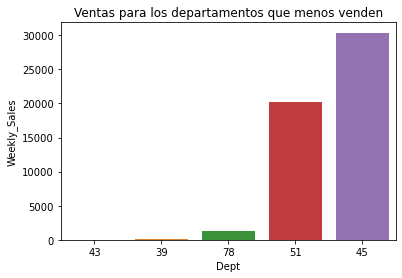

In [66]:
sns.barplot(x='Dept', y='Weekly_Sales', data=aux, order=aux['Dept'])
plt.title('Ventas para los departamentos que menos venden')

In [67]:
aux = df.loc[:, ['Dept', 'Weekly_Sales']].groupby('Dept').agg({'Dept': 'count'}).rename(columns={'Dept': 'count'}).reset_index().sort_values(by=['count'], ascending=True).iloc[:5, :].reset_index(drop=True)
aux.head()

,Dept,count
0,43,8
1,39,9
2,77,84
3,65,96
4,78,124


Como se puede ver, hay muy pocos registros de algunos departamentos, como es el caso del 43, por lo que tendría más sentido obtener las ventas medias.

In [68]:
aux = df.loc[:, ['Dept', 'Weekly_Sales']].groupby('Dept').agg({'Weekly_Sales': 'mean'}).sort_values(by=['Weekly_Sales'], ascending=True).iloc[:5, :].reset_index()
aux.head()

,Dept,Weekly_Sales
0,43,1.415000
1,78,10.151935
2,39,13.385556
3,51,22.806376
4,45,23.817035


Text(0.5, 1.0, 'Ventas medias para los departamentos que menos venden')

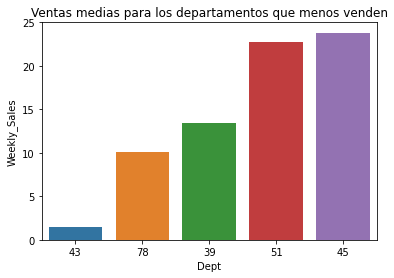

In [69]:
sns.barplot(x='Dept', y='Weekly_Sales', data=aux, order=aux['Dept'])
plt.title('Ventas medias para los departamentos que menos venden')

Vistos los resultados, los departamentos 51 y 45 no están obteniendo buenos resultados. Habría que estudiar el motivo, hecho que se queda fuera de la ciencia de datos, o al menos de estos datos en concreto. En cuanto a los principios de composición, al final es repetir lo que ya he comentado previamente.

### Tiendas con la menor relación ventas/superficie

In [70]:
aux = df.loc[:, ['Store', 'Weekly_Sales', 'Size']].groupby('Store').agg({'Weekly_Sales': 'sum', 'Size': 'sum'})
aux['Ratio'] = aux['Weekly_Sales']/aux['Size']
aux = aux.sort_values(by=['Ratio'], ascending=True).iloc[:5, :].reset_index()
aux.head()

,Store,Weekly_Sales,Size,Ratio
0,9,5.112498e+07,733983889,0.069654
1,15,5.955354e+07,815674304,0.073011
2,25,6.766955e+07,845634307,0.080022
3,32,1.127213e+08,1391409978,0.081012
4,21,7.244023e+07,887537444,0.081619


In [71]:
aux.describe()

,Store,Weekly_Sales,Size,Ratio
count,5.000000,5.000000e+00,5.000000e+00,5.000000
mean,20.400000,7.270193e+07,9.348480e+08,0.077064
std,8.876936,2.379806e+07,2.613403e+08,0.005395
min,9.000000,5.112498e+07,7.339839e+08,0.069654
25%,15.000000,5.955354e+07,8.156743e+08,0.073011
50%,21.000000,6.766955e+07,8.456343e+08,0.080022
75%,25.000000,7.244023e+07,8.875374e+08,0.081012
max,32.000000,1.127213e+08,1.391410e+09,0.081619


Text(0.5, 1.0, 'Tiendas con un menor ratio ventas/superficie')

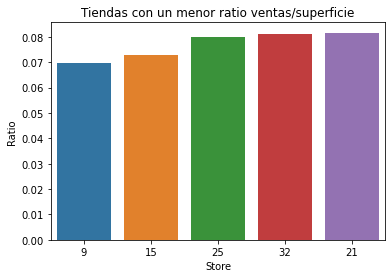

In [72]:
sns.barplot(x='Store', y='Ratio', data=aux, order=aux['Store'])
plt.title('Tiendas con un menor ratio ventas/superficie')

Dos apuntes:
- La tienda 9 obviamente es la que tiene un ratio más bajo.
- Sin embargo, la diferencia entre el valor mínimo y máximo es bastante pequeño, aunque sí estandarizásemos los resultados sí que habría una diferencia grande.

Un apunte sobre el resultado: aunque parezca que no está adimensionalizado en cuanto al número de mediciones en cada tienda, sí que lo está ya que al obtener la media de las ventas y el tamaño se divide por el mismo número.

# Agrupamiento

El agrupamiento es una técnica que permite realizar varios tipos de tareas en aprendizaje no supervisado. Un ejemplo ya se ha visto antes con la detección de atípicos, sin embargo, en este caso se trata de identificar el número de grupos que pueden existir junto como los integrantes de dicho grupo. Para ello se recurre a la implementación de Bayesian Gaussian Mixture que existe en la librería sklearn.

In [73]:
df.iloc[:, :-3]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.50,1705.28,3600.79,138.106581,8.150,A,203819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282446,27,18,2012-10-19,20775.91,False,56.53,4.153,2639.32,NaN,4.77,575.48,3147.23,142.863363,8.000,A,204184
282447,39,36,2010-05-21,5350.00,False,76.67,2.826,NaN,NaN,NaN,NaN,NaN,209.392294,8.464,A,184109
282448,14,29,2010-04-30,10939.87,False,53.15,2.921,NaN,NaN,NaN,NaN,NaN,181.662036,8.899,A,200898
282449,15,90,2011-07-01,5013.89,False,67.43,3.916,NaN,NaN,NaN,NaN,NaN,135.446800,7.806,B,123737


In [74]:
aux = df.drop(columns=['Disc_Fuel_Price', 'Disc_Unemployment', 'Disc_CPI', 'Dept']).groupby('Store').mean()
aux

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,,,,,,,,,,,,
1,21723.547988,0.068041,68.207141,3.218264,8066.247076,3005.707271,1076.666687,3727.020218,5042.117496,215.991151,7.609921,151315
2,27119.481885,0.071877,68.111503,3.220765,10711.991545,5371.570155,1678.137687,4797.626812,6360.267728,215.652431,7.623635,202307
3,6305.598225,0.070983,71.268557,3.213810,3077.495926,1077.667600,993.223739,937.716365,1265.165492,219.391361,7.175642,37392
4,29083.631372,0.071921,62.146463,3.212133,9468.167770,4676.927980,1959.762114,5255.345437,6842.474023,128.662722,5.979042,205863
5,5036.005167,0.069953,69.255281,3.222136,2989.215694,1103.517108,798.347292,1124.348763,2571.255867,216.566950,6.297436,34875
6,21829.786051,0.069081,69.668185,3.216288,8416.562099,4001.047947,1792.718077,3739.188763,5703.079182,217.531526,6.608440,202505
7,8472.431569,0.070972,39.652850,3.243441,6235.557117,1737.232363,856.885478,1612.246213,3513.859759,193.687542,8.582337,70713
8,13057.660920,0.069442,62.533734,3.218119,7119.779543,2617.941302,1143.210921,1738.421646,5546.089419,219.393793,6.095505,155078
9,8764.783751,0.068918,67.678006,3.224110,3229.410672,1247.729032,1102.117519,1070.299456,3701.868685,219.650343,6.102044,125833


In [75]:
from sklearn.mixture import BayesianGaussianMixture

In [76]:
labels = BayesianGaussianMixture(n_components=2, random_state=42, n_init=1, tol=1e-3, max_iter=int(1e4)).fit_predict(aux)

In [77]:
np.unique(labels)

array([0, 1])

In [78]:
aux[labels==0]

,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,,,,,,,,,,,,
1,21723.547988,0.068041,68.207141,3.218264,8066.247076,3005.707271,1076.666687,3727.020218,5042.117496,215.991151,7.609921,151315
2,27119.481885,0.071877,68.111503,3.220765,10711.991545,5371.570155,1678.137687,4797.626812,6360.267728,215.652431,7.623635,202307
4,29083.631372,0.071921,62.146463,3.212133,9468.167770,4676.927980,1959.762114,5255.345437,6842.474023,128.662722,5.979042,205863
6,21829.786051,0.069081,69.668185,3.216288,8416.562099,4001.047947,1792.718077,3739.188763,5703.079182,217.531526,6.608440,202505
8,13057.660920,0.069442,62.533734,3.218119,7119.779543,2617.941302,1143.210921,1738.421646,5546.089419,219.393793,6.095505,155078
11,18929.817611,0.070326,72.383737,3.220128,8948.113462,3256.229298,1481.092478,3786.918360,5523.478289,219.418375,7.174820,207499
13,27449.395862,0.070372,53.564721,3.284367,11077.420829,5919.773447,2963.079169,5024.821137,7301.984357,128.673413,7.006068,219622
14,28801.765380,0.069151,57.797104,3.417706,11714.622489,5387.860601,2038.819096,4225.054179,5690.716032,186.290252,8.649973,200898
19,20568.637673,0.069740,52.268316,3.579004,10649.151569,4320.944064,2045.528953,4987.094491,5301.394674,135.087055,7.996117,203819


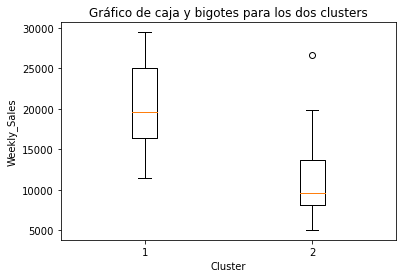

In [79]:
plt.boxplot([aux.loc[labels==0, 'Weekly_Sales'], aux.loc[labels==1, 'Weekly_Sales']])
plt.xlabel('Cluster')
plt.ylabel('Weekly_Sales')
plt.title('Gráfico de caja y bigotes para los dos clusters')
plt.show()

Como se puede observar, se pueden utilizar estos dos clústers para identificar cuáles son las propiedades de las tiendas que hacen que haya unas ventas mayores, ya que uno de los dos grupos posee una mayor cantidad que el otro.

Principios de composición:
- El diagrama de caja y bigotes representa excelentemente resúmenes de datos con una media y algunos cuantiles.
- Los valores atípicos de cada grupo se representan con puntos separados.
- La posición de la línea respecto a la caja muestra si existe alguna cola pesada en la distribución.

# Figuras para el dashboard

[(-100.0, 50000.0), Text(0.5, 1.0, 'KDE entre temperatura y ventas semanales')]

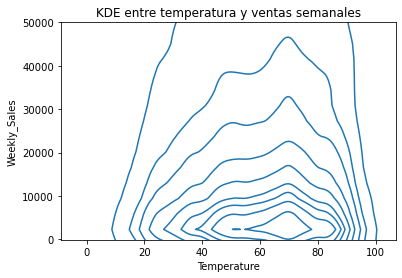

In [87]:
p = sns.kdeplot(x='Temperature', y='Weekly_Sales', data=df)
p.set(ylim=(-100, 50000), title='KDE entre temperatura y ventas semanales')
#plt.suptitle('KDE entre Temperatura y ventas semanales')